# play around with alibaba data

In [118]:
import json
import pandas as pd

# List of filenames
filenames = [
    'rd_threepio.categories.json',
    'rd_threepio.brackets.json',
    'rd_threepio.cities.json',
    'rd_threepio.countries.json',
    'rd_threepio.discounts.json',
    'rd_threepio.attributes.json',
    'rd_threepio.likes.json',
    'rd_threepio.pois.json',
    'rd_threepio.reviews.json',
    'rd_threepio.replies.json',
    'rd_threepio.tags.json',
    'rd_threepio.homes.json',
    'rd_threepio.landing_pages.json',
    'rd_threepio.wishlists.json',
    'rd_threepio.languages.json',
    'rd_threepio.plan_tags.json',
    'rd_threepio.provinces.json',
    'rd_threepio.reply_likes.json'
]

# Dictionary to store the loaded JSON data
data = {}

# Loop through the filenames and load the JSON data
for filename in filenames:
    with open(filename) as f:
        key = filename.split('.')[1]  # Extract the key from the filename for example  
        data[key] = json.load(f)

# Access the data using the keys
categories = data['categories']
brackets = data['brackets']
cities = data['cities']
countries = data['countries']
discount = data['discounts']
attributes = data['attributes']
likes = data['likes']
pois = data['pois']
reviews = data['reviews']
replies = data['replies']
tags = data['tags']
homes = data['homes']
landing_pages = data['landing_pages']
wishlists = data['wishlists']
languages = data['languages']
plan_tags = data['plan_tags']
provinces = data['provinces']
reply_likes = data['reply_likes']

# we only need the pois and cities and categories dataframes for now!

In [119]:
# List of filenames and corresponding keys
file_keys = [
    'categories', 'brackets', 'cities', 'countries', 'discount', 'attributes', 
    'likes', 'pois', 'reviews', 'replies', 'tags', 'homes', 'landing_pages', 
    'wishlists', 'languages', 'plan_tags', 'provinces', 'reply_likes'
]

# List of data
files = [categories, brackets, cities, countries, discount, attributes, likes, pois, reviews, replies, tags, homes, landing_pages, wishlists, languages, plan_tags, provinces, reply_likes]

# Convert the list of files to DataFrames and store them in a dictionary
files_dict = {key: pd.DataFrame(data) for key, data in zip(file_keys, files)}



In [120]:
brackets_df = files_dict['brackets']
brackets_df['_id'] = brackets_df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
brackets_df['_id'] = brackets_df['_id'].apply(lambda x: x['$date'] if isinstance(x, dict) and '$date' in x else x)



In [121]:
def shorten_cities(df): #df=cities
    
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id','slug']
    df = df[columns_to_keep]

    # Convert '_id' from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    #rows to keep : df['slug']== 'isfahan-city' or df['slug']=='tabriz-city' or df['slug']=='shiraz-city' or df['slug']=='mashhad-city'
    rows_to_keep = ['isfahan-city', 'tabriz-city', 'shiraz-city', 'mashhad-city']
    df = df[df['slug'].isin(rows_to_keep)]


    return df

cities_df_raw = files_dict['cities']

cities_df = shorten_cities(cities_df_raw)
cities_df

,_id,slug
1,6140a4235c49bb986631011b,isfahan-city
2,6140a4862dc2260e43ffa306,tabriz-city
3,6140a4bd2dc2260e43ffa307,shiraz-city
4,6140a5085c49bb986631011c,mashhad-city


In [122]:
def shorten_categories(df): #df=categories
    
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id','name', 'slug']
    df = df[columns_to_keep]

    # Convert '_id' from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    return df

categories_df_raw = files_dict['categories']

categories_df = shorten_categories(categories_df_raw)
categories_df




,_id,name,slug
0,612b815e2d28e7b40b49ae84,خورد و خوراک,food
1,612b815e2d28e7b40b49ae85,رستوران,restaurant
2,612b815e2d28e7b40b49ae89,کافه,cafe
3,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar
4,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,attractions
5,612b815e2d28e7b40b49ae90,جاذبه‌ی طبیعی,natural_attractions
6,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
7,612b815e2d28e7b40b49aea1,جاذبه‌ی تفریحی,entertainment
8,612b815e2d28e7b40b49aeae,مراکز فرهنگی,Cultural_centers
9,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping


In [123]:
categories_df.to_csv('categories.csv', index=False)

In [124]:

def shorten_pois(df, cities_df, categories_df): #df=pois, cities_df=shortened df of cities
    # Delete all rows where 'is_deleted' is True
    df = df[df['is_deleted'] != True]
    
    # Keep only the specified columns
    columns_to_keep = ['_id', 'city_id', 'name','slug', 'location', 'category_id', 'open_hours', 'ratings'] #maybe add 'parent_category_ids'
    df = df[columns_to_keep]
    
    # Convert from '$oid' format to strings
    df['_id'] = df['_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    df['city_id'] = df['city_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    df['category_id'] = df['category_id'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)
    #df['parent_category_ids'] = df['parent_category_ids'].apply(lambda x: x['$oid'] if isinstance(x, dict) and '$oid' in x else x)

    
    # use cities_df to replace city_id with city slug and if city_id is not in cities_df, delete that row
    df = df.merge(cities_df, left_on='city_id', right_on = '_id', how='inner', suffixes=('', '_city')) #suffixes=('', '_city') to avoid duplicate columns 
    #merge the categories_df to replace category_id with category name
    df = df.merge(categories_df, left_on='category_id', right_on = '_id', how='inner', suffixes=('', '_category')) #suffixes=('', '_category') to avoid duplicate columns
    #drop city_id and category_id columns
    df.drop(['city_id', 'category_id'], axis=1, inplace=True) 


    #reorder the columns (final_columns_to_keep)
    #final_columns_to_keep = ['poi_id', 'name', 'city', 'location', 'category_id', 'open_hours', 'ratings', 'parent_category_ids']
    #df = df[final_columns_to_keep]

    return df


# Shorten the 'pois' DataFrame
pois_df = files_dict['pois']
pois_df = shorten_pois(pois_df, cities_df, categories_df)
pois_df.head()




,_id,name,slug,location,open_hours,ratings,_id_city,slug_city,_id_category,name_category,slug_category
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"{'type': 'Point', 'coordinates': [29.6147702, ...",[],"{'average': 4.8, 'count': 20, 'specifics': {'1...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
1,614edf99a5e04db3e9ed4f09,هتل کاوه,kaveh-hotel-isfahan,"{'type': 'Point', 'coordinates': [32.7014818, ...","[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...","{'average': 3.5, 'count': 6, 'specifics': {'1'...",6140a4235c49bb986631011b,isfahan-city,612b815e2d28e7b40b49aeb8,هتل,Hotel
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"{'type': 'Point', 'coordinates': [29.6360623, ...","[{'start': {'hour': 8, 'min': 0}, 'end': {'hou...","{'average': 4.925925925925926, 'count': 27, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"{'type': 'Point', 'coordinates': [29.610914, 5...",[],"{'average': 4.454545454545454, 'count': 11, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae91,جاذبه‌ی شهری,urban_attractions
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"{'type': 'Point', 'coordinates': [29.5925335, ...","[{'start': {'hour': 8, 'min': 0}, 'end': {'hou...","{'average': 4.454545454545454, 'count': 11, 's...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeae,مراکز فرهنگی,Cultural_centers


In [125]:
# check if the is a location in the pois_df that is not a dictionary
pois_df['location'].apply(lambda x: type(x) != dict).sum()

# check if the type of the location is not a 'Point'
pois_df['location'].apply(lambda x: x['type'] != 'Point').sum()

#check if the coordinates is not a list and the length of the list is not 2
pois_df['location'].apply(lambda x: type(x['coordinates']) != list or len(x['coordinates']) != 2).sum()


0

In [126]:
# # also create a function that convert the poi id to the list of coordinates
# # to-do: use this function in the def dist(poi_1,poi_2) to beautify the code
# def poi_to_coordinates(poi_id):
#     poi = pois_df[pois_df['_id']==poi_id]
#     return poi['location'].iloc[0]['coordinates']


# def dist(poi_1,poi_2): #take poi id as input from the _id column of pois_df and return the distance between the two pois
#     poi1 = pois_df[pois_df['_id']==poi_1]
#     poi2 = pois_df[pois_df['_id']==poi_2]
#     return ((poi1['location'].iloc[0]['coordinates'][0]-poi2['location'].iloc[0]['coordinates'][0])**2 + (poi1['location'].iloc[0]['coordinates'][1]-poi2['location'].iloc[0]['coordinates'][1])**2)**0.5

# #test the function
# dist('614eef84837b47a5692b18d7','614efff9a5e04db3e9ed4f0b')




In [127]:
# def a fuction that replace the 'location' column to the 'coordinates' column for the eas of use: location_to_coordinates(df)
def location_to_coordinates(df):
    df['coordinates'] = df['location'].apply(lambda x: x['coordinates'])
    df.drop('location', axis=1, inplace=True)
    return df

pois_df=location_to_coordinates(pois_df)

def dist(poi_1,poi_2):
    poi1 = pois_df[pois_df['_id']==poi_1]
    poi2 = pois_df[pois_df['_id']==poi_2]
    return ((poi1['coordinates'].iloc[0][0]-poi2['coordinates'].iloc[0][0])**2 + (poi1['coordinates'].iloc[0][1]-poi2['coordinates'].iloc[0][1])**2)**0.5


In [128]:

# def a function that convert the ratings column (dictionary with 3 keys) to  3 columns: 'average_rating', 'rating_count', 'rating_specifics',
def ratings_to_columns(df):
    df['average_rating'] = df['ratings'].apply(lambda x: x['average'])
    df['rating_count'] = df['ratings'].apply(lambda x: x['count'])
    df['rating_specifics'] = df['ratings'].apply(lambda x: x['specifics'])
    df.drop('ratings', axis=1, inplace=True)
    return df

pois_df = ratings_to_columns(pois_df)



In [129]:
# create 3 seperate pois_df : 
# 1. pois_df with category restaurant related : _id_category in [612b815e2d28e7b40b49ae84, 612b815e2d28e7b40b49ae85, 612b815e2d28e7b40b49ae89]	
# 2. pois_df with category hotel realted : _id_category in [612b815e2d28e7b40b49aeb7, 612b815e2d28e7b40b49aeb8, 612b815e2d28e7b40b49aeb9, 612b815e2d28e7b40b49aeba, 612b815e2d28e7b40b49aebb]	
# 3. pois_df with category attraction realted : _id_category in rest of pois_df
# edit : the 1,2 are merged

def split_pois_df(pois_df):

    hotel_category = ['612b815e2d28e7b40b49aeb7', '612b815e2d28e7b40b49aeb8', '612b815e2d28e7b40b49aeb9', '612b815e2d28e7b40b49aeba', '612b815e2d28e7b40b49aebb']
    pois_df_hotel = pois_df[pois_df['_id_category'].isin(hotel_category)]
    pois_df_attraction = pois_df[~pois_df['_id_category'].isin(hotel_category)]
    return pois_df_hotel, pois_df_attraction

pois_df_hotel, pois_df_attraction = split_pois_df(pois_df)


In [154]:
# seperate the pois dataframe base on city_slug: isfahan-city, tabriz-city, shiraz-city, mashhad-city
df=pois_df_attraction
shiraz_city_pois_attraction=df[df['slug_city']=='shiraz-city']
isfahan_city_pois_attraction=df[df['slug_city']=='isfahan-city']
tabriz_city_pois_attraction=df[df['slug_city']=='tabriz-city']
mashhad_city_pois_attraction=df[df['slug_city']=='mashhad-city']


df=pois_df_hotel
shiraz_city_pois_hotel=df[df['slug_city']=='shiraz-city']
isfahan_city_pois_hotel=df[df['slug_city']=='isfahan-city']
tabriz_city_pois_hotel=df[df['slug_city']=='tabriz-city']
mashhad_city_pois_hotel=df[df['slug_city']=='mashhad-city']



In [155]:
print('attraction numbers')
for city in [shiraz_city_pois_attraction, isfahan_city_pois_attraction, tabriz_city_pois_attraction, mashhad_city_pois_attraction]:
    print(len(city))
print('hotel numbers')
for hotel in [shiraz_city_pois_hotel, isfahan_city_pois_hotel, tabriz_city_pois_hotel, mashhad_city_pois_hotel]:
    print(len(hotel))
# print('restaurant numbers')
# for restaurant in [shiraz_city_pois_restaurant, isfahan_city_pois_restaurant, tabriz_city_pois_restaurant, mashhad_city_pois_restaurant]:
#     print(len(restaurant))



attraction numbers
220
371
291
193
hotel numbers
52
69
29
150


In [156]:
# #see if we have enough good data for each city's hotels
# print('hotels evaluation')
# for city in [shiraz_city_pois_hotel, isfahan_city_pois_hotel, tabriz_city_pois_hotel, mashhad_city_pois_hotel]:
#     #print city name
#     print(city['slug_city'].iloc[0],len(city[city['rating_count'] > 10]), len(city[city['average_rating'] > 4]))
    

# #see if we have enough good data for each city's restaurants
# print("-------------------------------")
# print('restaurants evaluation')
# for city in [shiraz_city_pois_restaurant, isfahan_city_pois_restaurant, tabriz_city_pois_restaurant, mashhad_city_pois_restaurant]:
#     #print city name
#     print(city['slug_city'].iloc[0],len(city[city['rating_count'] > 10]), len(city[city['average_rating'] > 4]))
    

# #see if we have enough good data for each city's attractions
# print("-------------------------------")
# print('attractions evaluation')
# for city in [shiraz_city_pois_attraction, isfahan_city_pois_attraction, tabriz_city_pois_attraction, mashhad_city_pois_attraction]:
#     #print city name
#     print(city['slug_city'].iloc[0],len(city[city['rating_count'] > 10]), len(city[city['average_rating'] > 4]))
    


In [157]:
# change where shiraz_city_pois_attraction['slug_category'] == ('restaurant' or 'cafe' )to 'food'
# change all the the _id_category to 612b815e2d28e7b40b49ae84 where the slug_category is 'food'
# change all the the name_category to 'خورد و خوراک' where the slug_category is 'food'

shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['restaurant', 'cafe']), '_id_category'] = '612b815e2d28e7b40b49ae84'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['restaurant', 'cafe']), 'name_category'] = 'خورد و خوراک'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['restaurant', 'cafe']), 'slug_category'] = 'food'


# also change the   the _id_category to 612b815e2d28e7b40b49ae8f where the slug_category is 'natural_attractions' or 'urban_attractions' or 'entertainment' or 'Cultural_centers' or juice_bar
# change all the the name_category to 'جاذبه‌های گردشگری' where the slug_category is 'natural_attractions' or 'urban_attractions' or 'entertainment' or 'Cultural_centers'
#change the slug_category to 'attractions' where the slug_category is 'natural_attractions' or 'urban_attractions' or 'entertainment' or 'Cultural_centers'

shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), '_id_category'] = '612b815e2d28e7b40b49ae8f'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin([ 'urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), 'name_category'] = 'جاذبه‌های گردشگری'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin([ 'urban_attractions', 'entertainment', 'Cultural_centers', 'juice_bar']), 'slug_category'] = 'urban_attractions'



# also change the   the _id_category to 612b815e2d28e7b40b49aeb4 where the slug_category is  'Shopping_centers' or 'shops'
# change all the the name_category to 'بازار و خرید' where the slug_category is 'Shopping_centers' or 'shops'
#change the slug_category to 'shopping' where the slug_category is 'Shopping_centers' or 'shops'

shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['Shopping_centers', 'shops']), '_id_category'] = '612b815e2d28e7b40b49aeb4'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['Shopping_centers', 'shops']), 'name_category'] = 'بازار و خرید'
shiraz_city_pois_attraction.loc[shiraz_city_pois_attraction['slug_category'].isin(['Shopping_centers', 'shops']), 'slug_category'] = 'shopping'



In [158]:
''' if the data of open hours exist change the structure of the open hours (from a dictionary) to a list of 2 values: open and close (minutes from midnight)
 if the data of open hours does not exist, fill it with [0,0]

 the structure for  shiraz_city_pois_attraction['open_hours'].iloc[1] is like below: 
 
[{'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'saturday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'sunday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'monday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'tuesday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'wednesday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'thursday'},
 {'start': {'hour': 8, 'min': 0},
  'end': {'hour': 20, 'min': 30},
  'day_of_week': 'friday'}]

  take the first element of the list and from this dictionary extract the 'start' key and from the 'start' key extract the 'hour' and 'min' keys and convert them to minutes from midnight
    do the same for the 'end' key == replace the whole with a list of 2 values: open and close (minutes from midnight)
    if the open hours was an empty list, fill it with [0,0]
'''

def open_hours_to_minutes(df):
    df['open_hours'] = df['open_hours'].apply(lambda x: [0,0] if len(x)==0 else [x[0]['start']['hour']*60+x[0]['start']['min'], x[0]['end']['hour']*60+x[0]['end']['min']])
    return df

shiraz_city_pois_attraction_modified_OH = open_hours_to_minutes(shiraz_city_pois_attraction)




C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_7744\3715795044.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_hours'] = df['open_hours'].apply(lambda x: [0,0] if len(x)==0 else [x[0]['start']['hour']*60+x[0]['start']['min'], x[0]['end']['hour']*60+x[0]['end']['min']])


In [159]:
# now if the second element of the open hours is less than the first element, add 24*60 to the second element
def fix_open_hours(df):
    df['open_hours'] = df['open_hours'].apply(lambda x: [x[0], x[1]+24*60] if x[1]<x[0] else x)
    return df

shiraz_city_pois_attraction_modified_OH = fix_open_hours(shiraz_city_pois_attraction_modified_OH)
shiraz_city_pois_attraction_modified_OH

C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_7744\532430440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_hours'] = df['open_hours'].apply(lambda x: [x[0], x[1]+24*60] if x[1]<x[0] else x)


,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,average_rating,rating_count,rating_specifics
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6147702, 52.5452266]",4.800000,20,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 17}"
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"[480, 1230]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6360623, 52.5251428]",4.925926,27,"{'1': 0, '2': 0, '3': 0, '4': 2, '5': 25}"
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.610914, 52.5408433]",4.454545,11,"{'1': 0, '2': 0, '3': 1, '4': 4, '5': 6}"
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"[480, 840]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5925335, 52.5721767]",4.454545,11,"{'1': 0, '2': 1, '3': 1, '4': 1, '5': 8}"
5,614f2174bb9968a8d3525974,موزه نظامی باغ عفیف آباد,afif-abad-garden-military-museum,"[540, 1080]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6231997, 52.4983724]",4.500000,12,"{'1': 0, '2': 1, '3': 0, '4': 3, '5': 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,637222477610a578c0fbe937,پیاده راه سلامت شیراز,salamat-walkway-shiraz,"[1110, 1560]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6773251, 52.4817861]",4.500000,8,"{'1': 0, '2': 0, '3': 0, '4': 4, '5': 4}"
1367,637b633fb7f7b21f7facb03a,فروشگاه لباس تکتاز,taknaz-shopping-center-shiraz,"[540, 1260]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping,"[29.6324673, 52.5537672]",3.333333,3,"{'1': 0, '2': 0, '3': 2, '4': 1, '5': 0}"
1368,638de383c13688403717c1a5,پارک سایه (پارک نماز),saaye-park-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5956008, 52.6045795]",4.833333,6,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 5}"
1369,638de82fc13688403717c1a6,مرکز خرید نگین فارس عادل آباد,negin-fars-shopping-center-adel-abad-shiraz,"[510, 1440]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping,"[29.5805727, 52.5090539]",2.600000,10,"{'1': 5, '2': 0, '3': 1, '4': 2, '5': 2}"


In [160]:
# add a column as as 'spending_time' to the shiraz_city_pois_attraction_modified_OH dataframe. simply add a cosntant number regarding the categories
# 'food' : 60 minutes
# 'urban_attractions' : 120 minutes
# 'natural_attractions' : 120 minutes
# 'shopping' : 180 minutes

def add_spending_time(df):
    df['spending_time'] = df['slug_category'].apply(lambda x: 60 if x=='food' else 120 if x=='urban_attractions' or x=='natural_attractions' else 180)
    return df

shiraz_city_pois_attraction_modified_OH = add_spending_time(shiraz_city_pois_attraction_modified_OH)
shiraz_city_pois_attraction_modified_OH

C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_7744\1138154423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spending_time'] = df['slug_category'].apply(lambda x: 60 if x=='food' else 120 if x=='urban_attractions' or x=='natural_attractions' else 180)


,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,average_rating,rating_count,rating_specifics,spending_time
0,614edd75bb9968a8d3525972,حمام تاریخی وکیل,hammam-tarikhi-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6147702, 52.5452266]",4.800000,20,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 17}",120
2,614eef84837b47a5692b18d7,باغ ارم,eram-garden-shiraz,"[480, 1230]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6360623, 52.5251428]",4.925926,27,"{'1': 0, '2': 0, '3': 0, '4': 2, '5': 25}",120
3,614efff9a5e04db3e9ed4f0b,خانه تاریخی منطقی نژاد,manteghinejad-historical-mansion,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.610914, 52.5408433]",4.454545,11,"{'1': 0, '2': 0, '3': 1, '4': 4, '5': 6}",120
4,614f110b837b47a5692b18d9,موزه تاریخ طبیعی و تکنولوژی دانشگاه شیراز,natural-history-technology-museum,"[480, 840]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5925335, 52.5721767]",4.454545,11,"{'1': 0, '2': 1, '3': 1, '4': 1, '5': 8}",120
5,614f2174bb9968a8d3525974,موزه نظامی باغ عفیف آباد,afif-abad-garden-military-museum,"[540, 1080]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6231997, 52.4983724]",4.500000,12,"{'1': 0, '2': 1, '3': 0, '4': 3, '5': 8}",120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,637222477610a578c0fbe937,پیاده راه سلامت شیراز,salamat-walkway-shiraz,"[1110, 1560]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.6773251, 52.4817861]",4.500000,8,"{'1': 0, '2': 0, '3': 0, '4': 4, '5': 4}",120
1367,637b633fb7f7b21f7facb03a,فروشگاه لباس تکتاز,taknaz-shopping-center-shiraz,"[540, 1260]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping,"[29.6324673, 52.5537672]",3.333333,3,"{'1': 0, '2': 0, '3': 2, '4': 1, '5': 0}",180
1368,638de383c13688403717c1a5,پارک سایه (پارک نماز),saaye-park-shiraz,"[0, 0]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49ae8f,جاذبه‌های گردشگری,urban_attractions,"[29.5956008, 52.6045795]",4.833333,6,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 5}",120
1369,638de82fc13688403717c1a6,مرکز خرید نگین فارس عادل آباد,negin-fars-shopping-center-adel-abad-shiraz,"[510, 1440]",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb4,بازار و خرید,shopping,"[29.5805727, 52.5090539]",2.600000,10,"{'1': 5, '2': 0, '3': 1, '4': 2, '5': 2}",180


In [161]:
# count where the open hours is [0,0]
shiraz_city_pois_attraction_modified_OH['open_hours'].apply(lambda x: x==[0,0]).sum()

# delete the rows where the open hours is [0,0]
#shiraz_city_pois_attraction_modified_OH = shiraz_city_pois_attraction_modified_OH[shiraz_city_pois_attraction_modified_OH['open_hours']!=[0,0]]

# seperate the open hours to 2 columns: open and close
shiraz_city_pois_attraction_modified_OH['open_time'] = shiraz_city_pois_attraction_modified_OH['open_hours'].apply(lambda x: x[0])
shiraz_city_pois_attraction_modified_OH['close_time'] = shiraz_city_pois_attraction_modified_OH['open_hours'].apply(lambda x: x[1])



C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_7744\3317340300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiraz_city_pois_attraction_modified_OH['open_time'] = shiraz_city_pois_attraction_modified_OH['open_hours'].apply(lambda x: x[0])
C:\Users\Atarod-PC\AppData\Local\Temp\ipykernel_7744\3317340300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shiraz_city_pois_attraction_modified_OH['close_time'] = shiraz_city_pois_attraction_modified_OH['open_hours'].apply(lambda x: x[1])


In [162]:
shiraz_city_pois_attraction_modified_OH
# delete where the open_time is 0
shiraz_city_pois_attraction_modified_OH = shiraz_city_pois_attraction_modified_OH[shiraz_city_pois_attraction_modified_OH['open_time']!=0]
shiraz_city_pois_attraction_modified_OH=shiraz_city_pois_attraction_modified_OH[shiraz_city_pois_attraction_modified_OH['close_time']!=0]


In [163]:
# keep the columns that are needed: 'slug' 'name' 'coordinates' 'open_time' 'close_time' 'spending_time' 'slug_category' 
shiraz_city_pois_attraction_modified_OH = shiraz_city_pois_attraction_modified_OH[['slug',  'coordinates', 'open_time', 'close_time', 'spending_time', 'slug_category', 'average_rating']]

# change the 'slug' column name to 'name'
shiraz_city_pois_attraction_modified_OH.rename(columns={'slug':'name'}, inplace=True)

# reindex and drop the old index and also  csv the file
shiraz_city_pois_attraction_modified_OH.reset_index(drop=True, inplace=True)



shiraz_city_pois_attraction_modified_OH.to_csv('shiraz_city_pois_attraction_modified_OH.csv', index=False)
shiraz_city_pois_attraction_modified_OH






,name,coordinates,open_time,close_time,spending_time,slug_category,average_rating
0,eram-garden-shiraz,"[29.6360623, 52.5251428]",480,1230,120,urban_attractions,4.925926
1,natural-history-technology-museum,"[29.5925335, 52.5721767]",480,840,120,urban_attractions,4.454545
2,afif-abad-garden-military-museum,"[29.6231997, 52.4983724]",540,1080,120,urban_attractions,4.500000
3,persepolis-of-shiraz,"[29.9355247, 52.89211299999999]",480,1050,120,urban_attractions,4.893333
4,nasir-al-mulk-mosque-shiraz,"[29.6085479, 52.5486555]",420,1020,120,urban_attractions,4.769231
...,...,...,...,...,...,...,...
178,besat-park-shiraz,"[29.6194811, 52.501335]",570,1290,120,urban_attractions,4.666667
179,baba-abr-icecream-shiraz,"[29.6328026, 52.5390032]",540,1590,120,urban_attractions,4.000000
180,salamat-walkway-shiraz,"[29.6773251, 52.4817861]",1110,1560,120,urban_attractions,4.500000
181,taknaz-shopping-center-shiraz,"[29.6324673, 52.5537672]",540,1260,180,shopping,3.333333


In [164]:
shiraz_city_pois_hotel

,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,average_rating,rating_count,rating_specifics
40,615d5e1ca5e04db3e9ed4f29,هتل آناهیتا,anahita-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6088092, 52.5591794]",3.000000,4,"{'1': 0, '2': 1, '3': 2, '4': 1, '5': 0}"
41,615d5ff9a5e04db3e9ed4f2a,بوتیک هتل سنتی داروش,darvash-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6109617, 52.5386659]",4.300000,10,"{'1': 0, '2': 0, '3': 1, '4': 5, '5': 4}"
48,615d862dc81d50b6328383f4,هتل صدرا,sadra-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6204711, 52.5408835]",3.750000,4,"{'1': 0, '2': 0, '3': 2, '4': 1, '5': 1}"
57,616096ebe6ca40e3ee675b48,هتل رودکی,roodaki-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6209683, 52.5409699]",3.357143,14,"{'1': 3, '2': 0, '3': 4, '4': 3, '5': 4}"
58,61609804e6ca40e3ee675b49,هتل شیرازیس,shirazis-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6216702, 52.5415168]",4.312500,16,"{'1': 0, '2': 0, '3': 2, '4': 7, '5': 7}"
59,6160994de6ca40e3ee675b4a,هتل آپارتمان جام جم,jaamejam-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6212341, 52.5399065]",4.000000,4,"{'1': 0, '2': 0, '3': 2, '4': 0, '5': 2}"
83,6162d0f388e724743cfbe7f5,هتل شمس,shams-apartment-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6201121, 52.5511848]",4.200000,5,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 2}"
84,6162d199318374541e0f8079,هتل رویال,royal-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6326667, 52.5555361]",3.882353,17,"{'1': 1, '2': 1, '3': 3, '4': 6, '5': 6}"
85,6162d1f1dbdd5a47d77ff6f8,هتل نصیرالملک,nasir-almolk-hotel-shiraz,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6042572, 52.5387598]",2.772727,22,"{'1': 4, '2': 4, '3': 9, '4': 3, '5': 2}"
133,61665f46de4c0a3b704ff2c4,هتل قوام,ghavam-hotel-shirazi,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a4bd2dc2260e43ffa307,shiraz-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[29.6214785, 52.5501856]",3.000000,7,"{'1': 2, '2': 1, '3': 1, '4': 1, '5': 2}"


In [165]:

shiraz_city_pois_attraction_modified_OH['coordinates'] = shiraz_city_pois_attraction_modified_OH['coordinates'].apply(lambda x: [x[1], x[0]])

# add a column for the first element of coordinates and also the second element of coordinates
shiraz_city_pois_attraction_modified_OH['latitude'] = shiraz_city_pois_attraction_modified_OH['coordinates'].apply(lambda x: x[0])
shiraz_city_pois_attraction_modified_OH['longitude'] = shiraz_city_pois_attraction_modified_OH['coordinates'].apply(lambda x: x[1])

#save
shiraz_city_pois_attraction_modified_OH.to_csv('shiraz_city_pois_attraction_modified_OH_____.csv', index=False)


In [3]:
#csv read shiraz.csv 
import pandas as pd
shiraz = pd.read_csv('shiraz.csv')



In [5]:
shiraz

,name,coordinates,open_time,close_time,spending_time,slug_category,average_rating,latitude,longitude
0,eram-garden-shiraz,"[52.5251428, 29.6360623]",480,1230,120,urban_attractions,4.925926,52.525143,29.636062
1,natural-history-technology-museum,"[52.5721767, 29.5925335]",480,840,120,urban_attractions,4.454545,52.572177,29.592533
2,afif-abad-garden-military-museum,"[52.4983724, 29.6231997]",540,1080,120,urban_attractions,4.500000,52.498372,29.623200
3,persepolis-of-shiraz,"[52.89211299999999, 29.9355247]",480,1050,120,urban_attractions,4.893333,52.892113,29.935525
4,nasir-al-mulk-mosque-shiraz,"[52.5486555, 29.6085479]",420,1020,120,urban_attractions,4.769231,52.548656,29.608548
...,...,...,...,...,...,...,...,...,...
178,besat-park-shiraz,"[52.501335, 29.6194811]",570,1290,120,urban_attractions,4.666667,52.501335,29.619481
179,baba-abr-icecream-shiraz,"[52.5390032, 29.6328026]",540,1590,120,urban_attractions,4.000000,52.539003,29.632803
180,salamat-walkway-shiraz,"[52.4817861, 29.6773251]",1110,1560,120,urban_attractions,4.500000,52.481786,29.677325
181,taknaz-shopping-center-shiraz,"[52.5537672, 29.6324673]",540,1260,180,shopping,3.333333,52.553767,29.632467


Text(0.5, 1.0, 'Shiraz attractions')

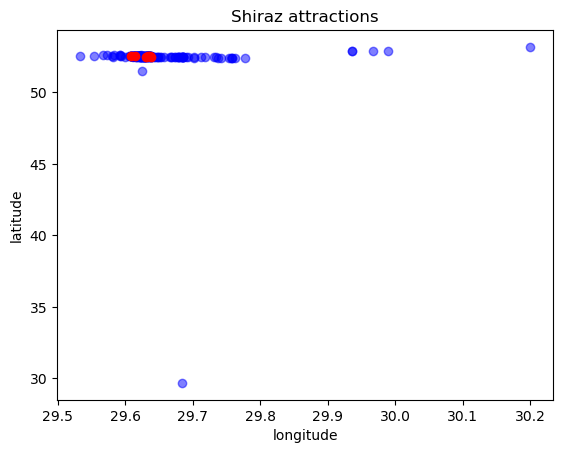

In [6]:
# scatter plot the maashhad attractions based on the coordinates
import matplotlib.pyplot as plt
# I will give you a set of index and make them red among other indexes. the list is [139, 168, 10, 24, 23, 31]

plt.scatter(shiraz['longitude'], shiraz['latitude'], c='blue', alpha=0.5)
plt.scatter(shiraz['longitude'].iloc[[139, 168, 10, 24, 23, 31]], shiraz['latitude'].iloc[[139, 168, 10, 24, 23, 31]], c='red', alpha=1)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Shiraz attractions')

In [166]:
type(shiraz_city_pois_attraction_modified_OH['coordinates'].iloc[0])

#csv the file
shiraz_city_pois_attraction_modified_OH.to_csv('shiraz_city_pois_attraction_modified_OH_new.csv', index=False)

In [167]:
type(shiraz_city_pois_attraction_modified_OH['coordinates'][0][0])

float

In [168]:
# print shiraz_city_pois_attraction where _id is '637222477610a578c0fbe937' 
shiraz_city_pois_attraction[shiraz_city_pois_attraction['_id']=='614eef84837b47a5692b18d7']['open_hours'].to_string()



'2    [480, 1230]'

In [169]:
shiraz_city_pois_attraction[shiraz_city_pois_attraction['_id']=='637222477610a578c0fbe937']['open_hours'].to_string()


'1366    [1110, 1560]'

In [170]:
shiraz_city_pois_attraction_modified_OH

,name,coordinates,open_time,close_time,spending_time,slug_category,average_rating,latitude,longitude
0,eram-garden-shiraz,"[52.5251428, 29.6360623]",480,1230,120,urban_attractions,4.925926,52.525143,29.636062
1,natural-history-technology-museum,"[52.5721767, 29.5925335]",480,840,120,urban_attractions,4.454545,52.572177,29.592533
2,afif-abad-garden-military-museum,"[52.4983724, 29.6231997]",540,1080,120,urban_attractions,4.500000,52.498372,29.623200
3,persepolis-of-shiraz,"[52.89211299999999, 29.9355247]",480,1050,120,urban_attractions,4.893333,52.892113,29.935525
4,nasir-al-mulk-mosque-shiraz,"[52.5486555, 29.6085479]",420,1020,120,urban_attractions,4.769231,52.548656,29.608548
...,...,...,...,...,...,...,...,...,...
178,besat-park-shiraz,"[52.501335, 29.6194811]",570,1290,120,urban_attractions,4.666667,52.501335,29.619481
179,baba-abr-icecream-shiraz,"[52.5390032, 29.6328026]",540,1590,120,urban_attractions,4.000000,52.539003,29.632803
180,salamat-walkway-shiraz,"[52.4817861, 29.6773251]",1110,1560,120,urban_attractions,4.500000,52.481786,29.677325
181,taknaz-shopping-center-shiraz,"[52.5537672, 29.6324673]",540,1260,180,shopping,3.333333,52.553767,29.632467


In [ ]:

#save the 4,4,4 dataframes to csv files  
shiraz_city_pois_attraction.to_csv('shiraz_city_pois_attraction.csv', index=True)
isfahan_city_pois_attraction.to_csv('isfahan_city_pois_attraction.csv', index=True)
tabriz_city_pois_attraction.to_csv('tabriz_city_pois_attraction.csv', index=False)
mashhad_city_pois_attraction.to_csv('mashhad_city_pois_attraction.csv', index=False)

shiraz_city_pois_hotel.to_csv('shiraz_city_pois_hotel.csv', index=False)
isfahan_city_pois_hotel.to_csv('isfahan_city_pois_hotel.csv', index=False)
tabriz_city_pois_hotel.to_csv('tabriz_city_pois_hotel.csv', index=False)
mashhad_city_pois_hotel.to_csv('mashhad_city_pois_hotel.csv', index=False)




In [ ]:
mashhad_city_pois_attraction

,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,average_rating,rating_count,rating_specifics
91,61653c1ff0ee4798280d3609,رستوران الماس,almas-restaurant-mashhad,[],6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae85,رستوران,restaurant,"[36.2820592, 59.6110694]",3.857143,7,"{'1': 1, '2': 1, '3': 0, '4': 1, '5': 4}"
92,61653e14e8ec7cdf173b9a69,رستوران مهستان شاندیز,mahestan-shandiz-restaurant-mashhad,"[{'start': {'hour': 11, 'min': 0}, 'end': {'ho...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae85,رستوران,restaurant,"[36.3236483, 59.4995402]",3.750000,12,"{'1': 2, '2': 0, '3': 2, '4': 3, '5': 5}"
97,616553f0f0ee4798280d360b,کافه شکر,sugar-cafe-mashhad,[],6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae89,کافه,cafe,"[36.295186, 59.5734618]",5.000000,2,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 2}"
98,616554b97e7ff31d183e61a4,پیتزا شبدیز,shabdiz-pizza-mashhad,"[{'start': {'hour': 11, 'min': 0}, 'end': {'ho...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae85,رستوران,restaurant,"[36.3071337, 59.5621714]",3.900000,10,"{'1': 1, '2': 0, '3': 1, '4': 5, '5': 3}"
99,616555857e7ff31d183e61a5,رستوران لیالی لبنان,lobnan-nights-restaurant,"[{'start': {'hour': 11, 'min': 0}, 'end': {'ho...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae85,رستوران,restaurant,"[36.2953188, 59.6123926]",4.037037,27,"{'1': 4, '2': 0, '3': 2, '4': 6, '5': 15}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,619a612d96ec1f9cdabeb38d,آبمیوه و بستنی امام الرئوف,imam-alraoof-ice-cream-shop-in-mashhad,"[{'start': {'hour': 10, 'min': 0}, 'end': {'ho...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar,"[36.2725802, 59.6040958]",4.727273,11,"{'1': 0, '2': 0, '3': 0, '4': 3, '5': 8}"
1142,619a627a14c80281c0b86422,بستنی کرمانیان,kermanian-ice-cream-shop-in-mashhad,"[{'start': {'hour': 7, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar,"[36.2577998, 59.6084526]",4.285714,7,"{'1': 0, '2': 1, '3': 0, '4': 2, '5': 4}"
1143,619a64e596ec1f9cdabeb38f,آبمیوه بستنی سنتی دوستان,doostan-ice-cream-shop-in-mashhad,"[{'start': {'hour': 7, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar,"[36.302826, 59.6091167]",4.200000,5,"{'1': 0, '2': 0, '3': 1, '4': 2, '5': 2}"
1144,619a667914c80281c0b86423,آبمیوه بستنی روزگاری و پسران,roozegari-va-pesaran-ice-cream-shop-in-mashhad,"[{'start': {'hour': 9, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49ae8e,آب‌میوه و بستنی,juice_bar,"[36.2737471, 59.6143528]",5.000000,3,"{'1': 0, '2': 0, '3': 0, '4': 0, '5': 3}"


In [ ]:

len(mashhad_city_pois_attraction[mashhad_city_pois_attraction['slug_category']=='urban_attractions'])

26

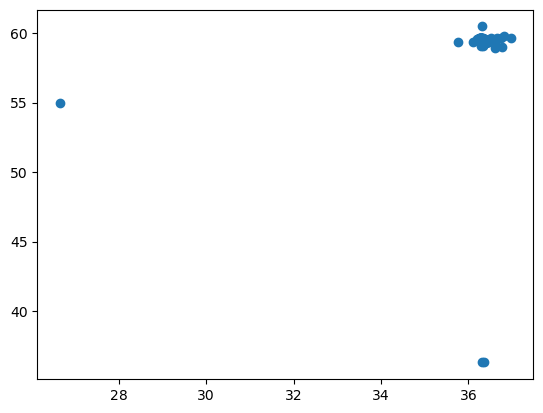

In [ ]:
# scatter plot the maashhad attractions based on the coordinates
import matplotlib.pyplot as plt
plt.scatter(mashhad_city_pois_attraction['coordinates'].apply(lambda x: x[0]), mashhad_city_pois_attraction['coordinates'].apply(lambda x: x[1]))
plt.show()

# I will give you a set of index and make them red among other indexes. the list is [139, 168, 10, 24, 23, 31]


In [ ]:
# delete the row where the x is less than 30.5 and y is less than 50.5  (outliers) 
mashhad_city_pois_attraction = mashhad_city_pois_attraction[(mashhad_city_pois_attraction['coordinates'].apply(lambda x: x[0]) > 30.5) & (mashhad_city_pois_attraction['coordinates'].apply(lambda x: x[1]) > 50.5)]

In [ ]:
mashhad_city_pois_hotel.head(10)

,_id,name,slug,open_hours,_id_city,slug_city,_id_category,name_category,slug_category,coordinates,average_rating,rating_count,rating_specifics
42,615d623125ea8adc7dde568a,هتل مرآت,meraat-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.277222, 59.6038968]",3.941176,17,"{'1': 2, '2': 1, '3': 3, '4': 1, '5': 10}"
43,615d688225ea8adc7dde568b,هتل بشری,boshra-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.286243, 59.609162]",4.833333,6,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 5}"
44,615d6d58a5e04db3e9ed4f2b,هتل تهران,tehran-hotel-mashahd,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.280662, 59.6101405]",4.550000,20,"{'1': 0, '2': 1, '3': 2, '4': 2, '5': 15}"
45,615d763ba5e04db3e9ed4f2c,هتل دیپلمات,diplomat-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.30416, 59.620444]",4.541667,24,"{'1': 1, '2': 0, '3': 0, '4': 7, '5': 16}"
46,615d817a25ea8adc7dde568d,هتل کوثر,kowsar-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.2814146, 59.6149407]",2.727273,11,"{'1': 5, '2': 1, '3': 1, '4': 0, '5': 4}"
47,615d85fbc81d50b6328383f3,هتل آتور,atoor-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.277406, 59.6078461]",4.333333,3,"{'1': 0, '2': 0, '3': 1, '4': 0, '5': 2}"
49,615d876ada496e8c85f5deb0,هتل پردیسان,pardisan-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.3007737, 59.5364713]",4.666667,6,"{'1': 0, '2': 0, '3': 1, '4': 0, '5': 5}"
50,615d88eb1e23da7b9049e3dc,هتل پاویون,pavion-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.2789371, 59.6120436]",2.900000,10,"{'1': 4, '2': 0, '3': 2, '4': 1, '5': 3}"
51,615d89e81e23da7b9049e3dd,هتل فرید,farid-hotel-mashhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.294218, 59.578262]",4.500000,4,"{'1': 0, '2': 0, '3': 1, '4': 0, '5': 3}"
60,61614596c3fbf357cfdc1e7b,هتل ابریشم,abrisham-hotel-mshhad,"[{'start': {'hour': 0, 'min': 0}, 'end': {'hou...",6140a5085c49bb986631011c,mashhad-city,612b815e2d28e7b40b49aeb8,هتل,Hotel,"[36.2814983, 59.612434]",4.666667,3,"{'1': 0, '2': 0, '3': 0, '4': 1, '5': 2}"


In [ ]:
import math
math.dist([3627.7222, 5960.38968], [3628.14146, 5961.49407])

1.181294298512713

In [ ]:
# find the two hotel that their distance is the largest
max_dist = 0
for i in range(len(mashhad_city_pois_hotel)):
    for j in range(i+1, len(mashhad_city_pois_hotel)):
        d = math.dist(mashhad_city_pois_hotel['coordinates'].iloc[i], mashhad_city_pois_hotel['coordinates'].iloc[j])
        if d > max_dist:
            max_dist = d
            max_i = i
            max_j = j
print(max_dist, max_i, max_j)


0.2289443121725646 119 125


In [ ]:
# also print the name of the two hotels
print(mashhad_city_pois_hotel.iloc[max_i]['name'])
print(mashhad_city_pois_hotel.iloc[max_j]['name'])


هتل پارک حیات
هتل پارسیس


In [ ]:
# give me the locations coordinates of the two hotels
print(mashhad_city_pois_hotel.iloc[max_i]['coordinates'])
print(mashhad_city_pois_hotel.iloc[max_j]['coordinates'])

# print first row of the dataframe
mashhad_city_pois_hotel.iloc[0]


[36.3257543, 59.4063206]
[36.2894254, 59.6323642]


_id                                          615d623125ea8adc7dde568a
name                                                         هتل مرآت
slug                                             meraat-hotel-mashhad
open_hours          [{'start': {'hour': 0, 'min': 0}, 'end': {'hou...
_id_city                                     6140a5085c49bb986631011c
slug_city                                                mashhad-city
_id_category                                 612b815e2d28e7b40b49aeb8
name_category                                                     هتل
slug_category                                                   Hotel
coordinates                                   [36.277222, 59.6038968]
average_rating                                               3.941176
rating_count                                                       17
rating_specifics            {'1': 2, '2': 1, '3': 3, '4': 1, '5': 10}
Name: 42, dtype: object

In [ ]:
import math

def haversine(coord1, coord2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Coordinates in radians
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance

def travel_time_between_coordinates(coord1, coord2, speed_kmh=50):
    """
    Calculate the travel time between two coordinates.
    
    Parameters:
    coord1 (tuple): (latitude, longitude) of the first point.
    coord2 (tuple): (latitude, longitude) of the second point.
    speed_kmh (float): Speed in kilometers per hour. Default is 50 km/h.
    
    Returns:
    float: Travel time in hours.
    """
    distance = haversine(coord1, coord2)
    travel_time = distance / speed_kmh
    return travel_time

# Example usage:
coord1 = (36.3257543, 59.4063206)
coord2 = (36.2894254, 59.6323642)
print(travel_time_between_coordinates(coord1, coord2))

0.4130769080362437


In [ ]:
coord1 = ([36.277222, 59.6038968])
coord2 = ([36.286243, 59.609162])
print(travel_time_between_coordinates(coord1, coord2))

0.02217139772247312


In [ ]:
import math

def degrees_to_radians(degrees):
    return degrees * math.pi / 180

# Example usage: 36.27717790575161, 59.604388880407654
latitude_degrees = 36.27717790575161
longitude_degrees =59.604388880407654

latitude_radians = degrees_to_radians(latitude_degrees)
longitude_radians = degrees_to_radians(longitude_degrees)

print(f"Latitude in radians: {latitude_radians}")
print(f"Longitude in radians: {longitude_radians}")

[36.277222, 59.6038968]

Latitude in radians: 0.6331561977871066
Longitude in radians: 1.0402928346022102


[36.277222, 59.6038968]

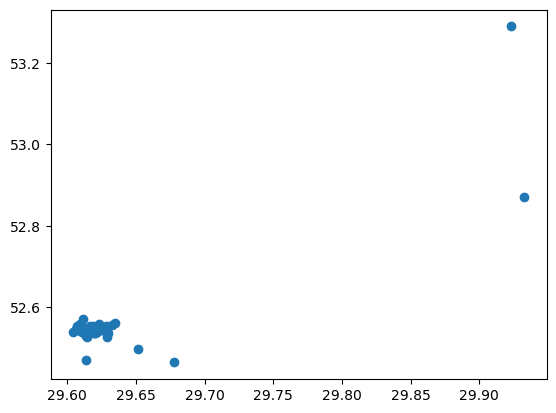

In [ ]:
# give me scatter plot of hotels in shiraz city
plt.scatter(shiraz_city_pois_hotel['coordinates'].apply(lambda x: x[0]), shiraz_city_pois_hotel['coordinates'].apply(lambda x: x[1]))
plt.show()

In [ ]:
# 